In [133]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns
%matplotlib inline

### Read data 

In [187]:
train = pd.read_csv('data/credit_train.csv', sep=';')
test = pd.read_csv('data/credit_test.csv', sep=';')
regions = pd.read_csv('data/regions.csv')

In [188]:
train.head()

,client_id,gender,age,marital_status,job_position,credit_sum,credit_month,tariff_id,score_shk,education,living_region,monthly_income,credit_count,overdue_credit_count,open_account_flg
0,1,M,48,MAR,UMN,"59998,00",10,1.6,"0,770249",GRD,КРАСНОДАРСКИЙ КРАЙ,30000.0,1.0,1.0,0
1,2,F,28,MAR,UMN,"10889,00",6,1.1,"0,248514",GRD,МОСКВА,43000.0,2.0,0.0,0
2,3,M,32,MAR,SPC,"10728,00",12,1.1,"0,459589",SCH,ОБЛ САРАТОВСКАЯ,23000.0,5.0,0.0,0
3,4,F,27,DIV,SPC,"12009,09",12,1.1,"0,362536",GRD,ОБЛ ВОЛГОГРАДСКАЯ,17000.0,2.0,0.0,0
4,5,M,45,MAR,SPC,"16908,89",10,1.1,"0,421385",SCH,ЧЕЛЯБИНСКАЯ ОБЛАСТЬ,25000.0,1.0,0.0,0


In [189]:
regions.head()

,living_region,normalized_living_region,federal_region
0,КАРАЧАЕВО-ЧЕРКЕССКАЯ РЕСП,КАРАЧАЕВО-ЧЕРКЕСИЯ,СКФО
1,КАЛУЖСКАЯ ОБЛАСТЬ,КАЛУЖСКАЯ ОБЛ,ЦФО
2,ОБЛ ОМСКАЯ,ОМСКАЯ ОБЛ,СФО
3,ОБЛ КИРОВСКАЯ,КИРОВСКАЯ ОБЛ,ПФО
4,ТОМСКАЯ,ТОМСКАЯ ОБЛ,СФО


In [190]:
train.dtypes

client_id                 int64
gender                   object
age                       int64
marital_status           object
job_position             object
credit_sum               object
credit_month              int64
tariff_id               float64
score_shk                object
education                object
living_region            object
monthly_income          float64
credit_count            float64
overdue_credit_count    float64
open_account_flg          int64
dtype: object

In [191]:
print 'Number of NaN values: Train dataset \n'
for c in train.columns:
    if train[c].isnull().sum() > 0:
        print c, '\t\t', train[c].isnull().sum()

Number of NaN values: Train dataset 

living_region 		192
monthly_income 		1
credit_count 		9230
overdue_credit_count 		9230


In [192]:
print 'Number of NaN values: Test dataset \n'
for c in test.columns:
    if test[c].isnull().sum() > 0:
        print c, '\t\t', test[c].isnull().sum()

Number of NaN values: Test dataset 

living_region 		116
credit_count 		4703
overdue_credit_count 		4703


### Fill NaN values, convert to right format 

In [193]:
train.living_region.fillna('XXX', inplace=True)
train.monthly_income.fillna(train.monthly_income.median(), inplace=True)
train.credit_count.fillna(-1, inplace=True)
train.overdue_credit_count.fillna(-1, inplace=True)

test.living_region.fillna('XXX', inplace=True)
test.credit_count.fillna(-1, inplace=True)
test.overdue_credit_count.fillna(-1, inplace=True)

*credit_sum* and *score_shk* следует перевести в numpy.float64 формат а *credit_count* и *overdue_credit_count*, наоборот, в int64

In [194]:
train.credit_sum = train.credit_sum.apply(lambda x: x.replace(',', '.')).astype(np.float64)
train.score_shk = train.score_shk.apply(lambda x: x.replace(',', '.')).astype(np.float64)
train.credit_count = train.credit_count.astype(np.int64)
train.overdue_credit_count = train.overdue_credit_count.astype(np.int64)

test.credit_sum = test.credit_sum.apply(lambda x: x.replace(',', '.')).astype(np.float64)
test.score_shk = test.score_shk.apply(lambda x: x.replace(',', '.')).astype(np.float64)
test.credit_count = test.credit_count.astype(np.int64)
test.overdue_credit_count = test.overdue_credit_count.astype(np.int64)

#### Normalize `living_region` data 

In [195]:
for c in test['living_region'].value_counts().index:
    if c not in train['living_region'].value_counts().index:
        print c, len(test[test['living_region'] == c])
        test.loc[test['living_region'] == c, 'living_region'] = 'XXX'

ЧУКОТСКИЙ АO 3
ОРЛОВСКАЯ 2
ПСКОВСКАЯ 1
ОБЛ. МОСКОВСКАЯ 1
АО ХАНТЫ-МАНСИЙСКИЙ-ЮГРА 1
ВОЛГОГРАДСКАЯ 1
МОСКОВСКИЙ П 1
КАМЧАТС??ИЙ КРАЙ 1
ПЕНЗЕНСКАЯ 1
Г. ЧЕЛЯБИНСК 1
РЕСПУБЛИКА ИНГУШЕТИЯ 1
Г САНКТ-ПЕТЕРБУРГ 1
ОРЕНБУРГСКАЯ 1
ЯМАЛО-НЕНЕЦКИЙ 1
РЕСП.ТАТАРСТАН 1
АО ЧУКОТСКИЙ 1


In [208]:
train = pd.merge(train, regions, on='living_region', how='left')
test = pd.merge(test, regions, on='living_region', how='left')

#### Encode data 

Все строковые типы следует также перевести в численный формат

In [214]:
from sklearn.preprocessing import LabelEncoder
lbl_enc = LabelEncoder()

for c in ['gender', 'marital_status', 'job_position', 'education', 'living_region', 'normalized_living_region', 'federal_region']:
    train[c] = lbl_enc.fit_transform(train[c])
    test[c] = lbl_enc.transform(test[c])

Убедимся, что все данные теперь имеют нужные формат

In [215]:
train.dtypes

client_id                     int64
gender                        int64
age                           int64
marital_status                int64
job_position                  int64
credit_sum                  float64
credit_month                  int64
tariff_id                   float64
score_shk                   float64
education                     int64
living_region                 int64
monthly_income              float64
credit_count                  int64
overdue_credit_count          int64
open_account_flg              int64
normalized_living_region      int64
federal_region                int64
dtype: object

### Prepare data to fit model 

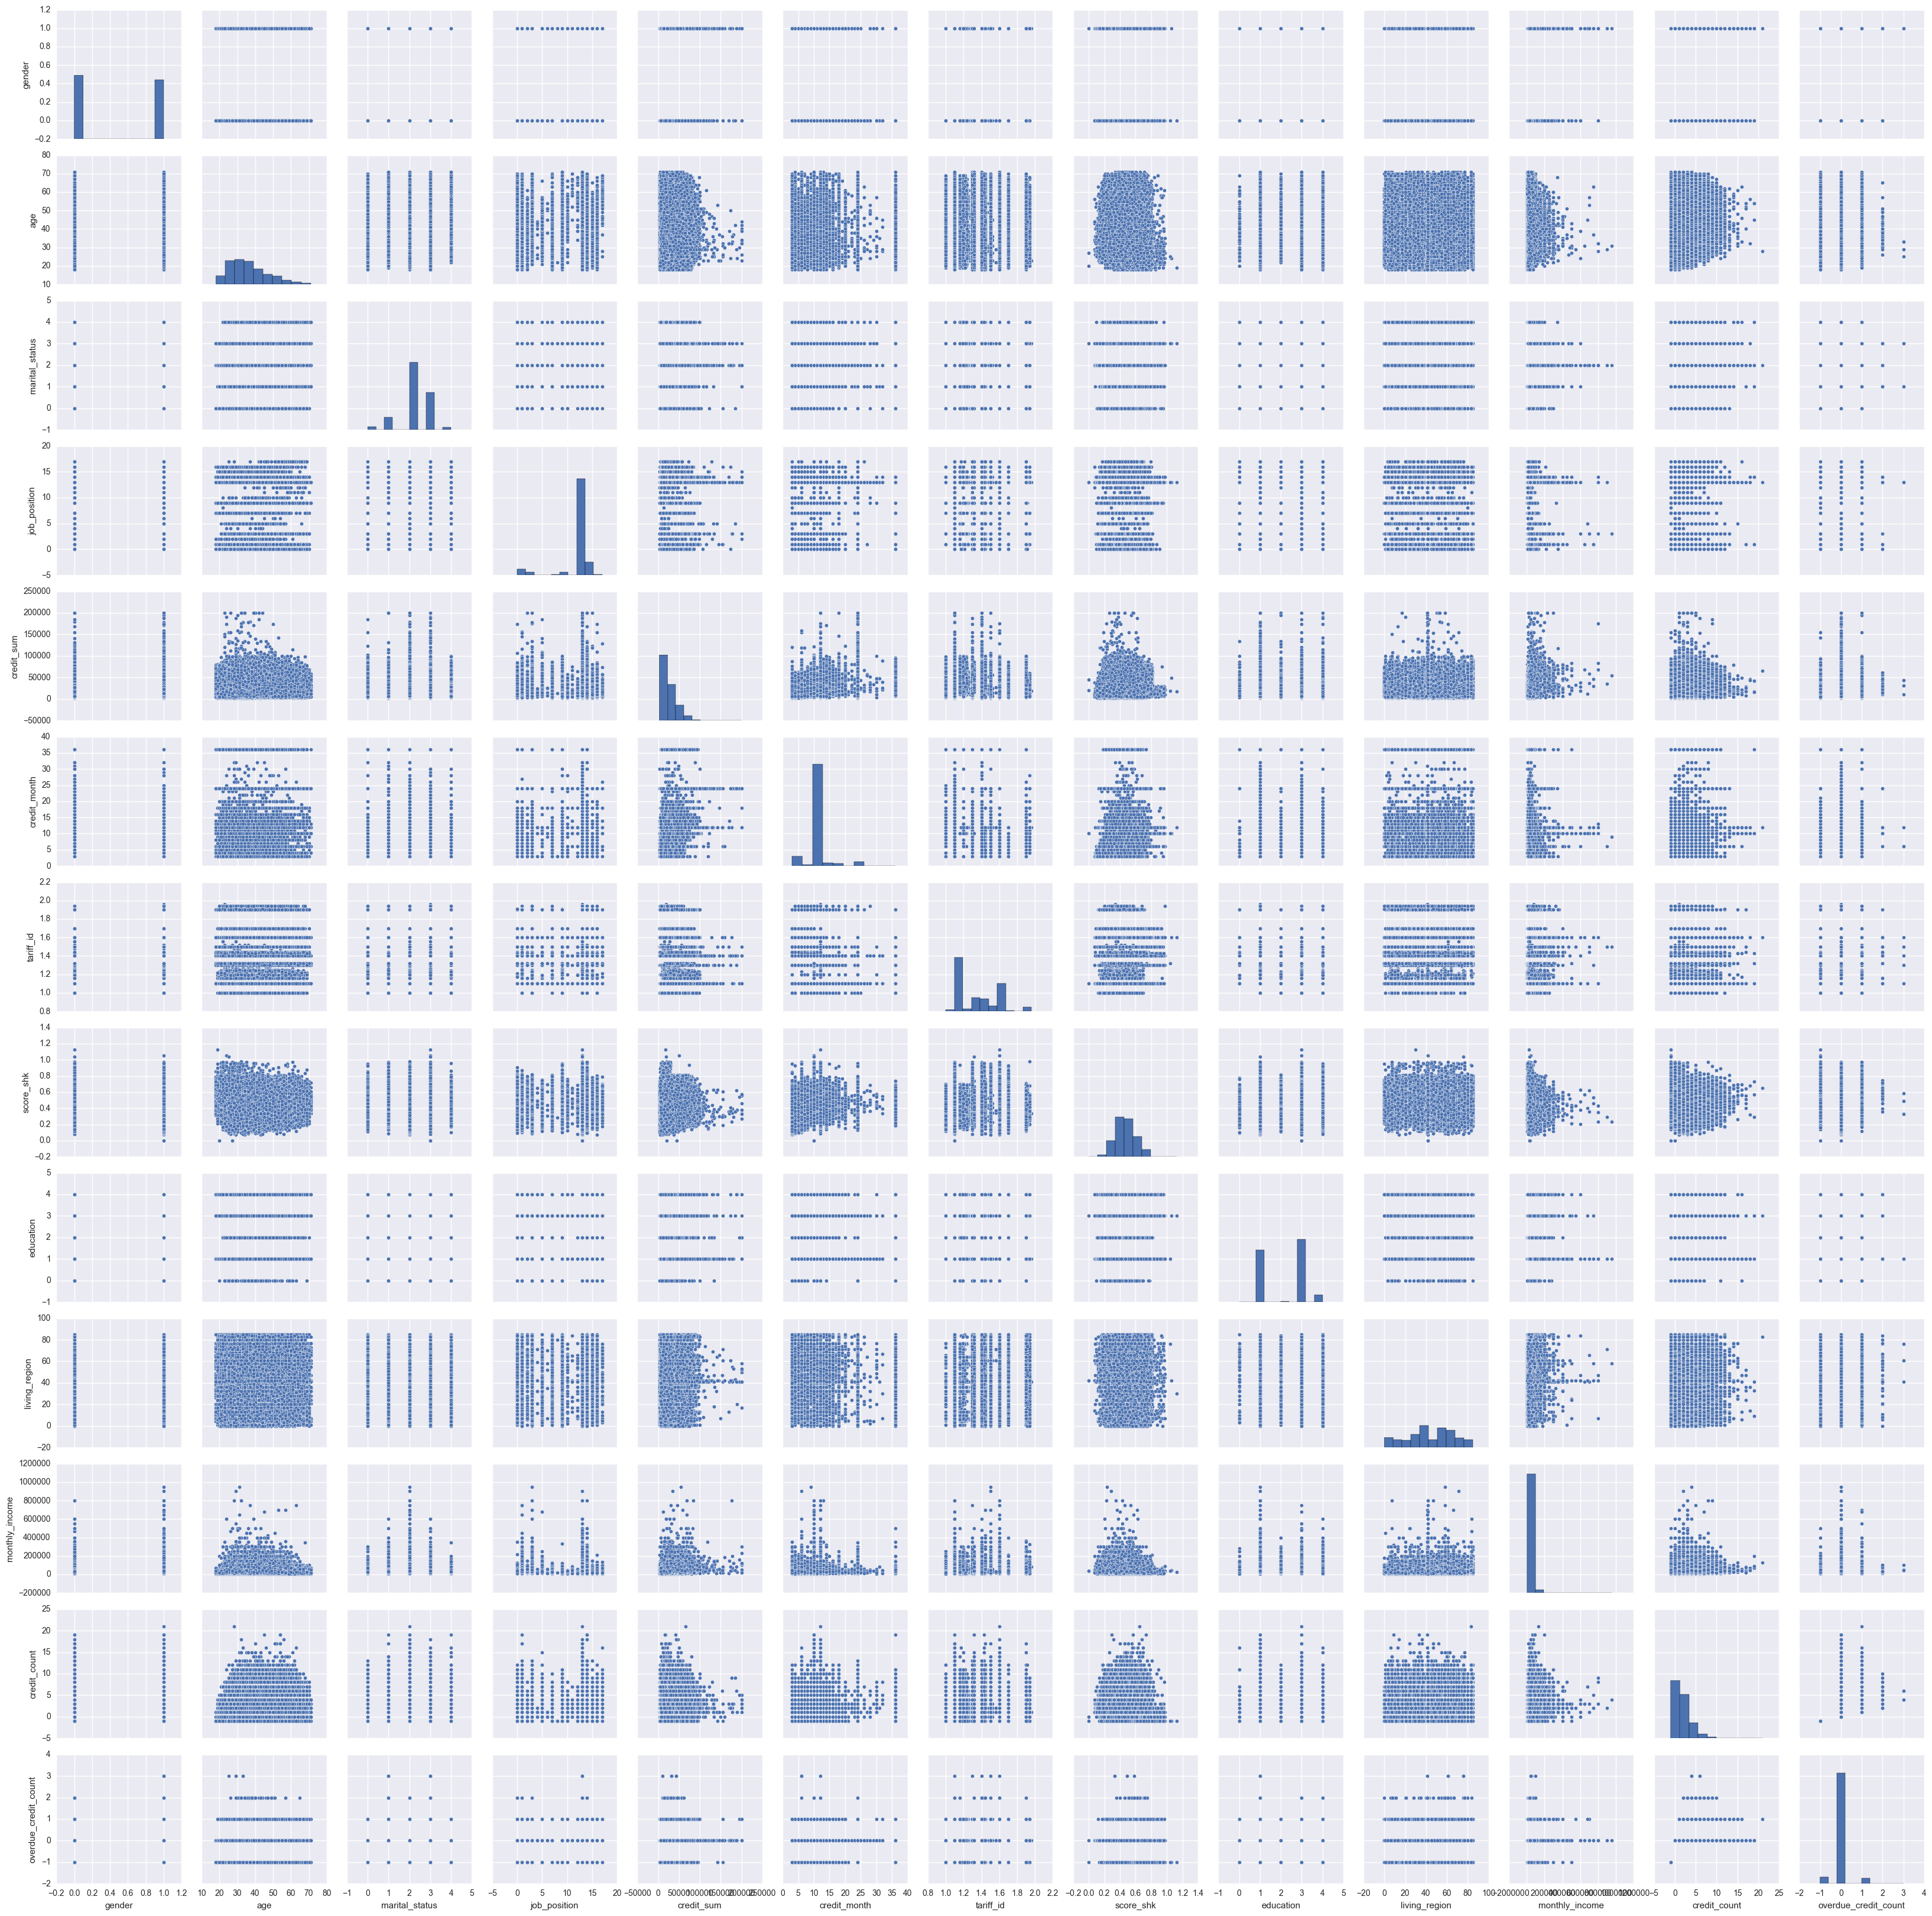

In [44]:
sns.pairplot(train_x)

#### Convert to dummies 

In [43]:
for c in train.columns:
    print c, len(train[c].value_counts())

client_id 170746
gender 2
age 54
marital_status 5
job_position 18
credit_sum 42769
credit_month 31
tariff_id 32
score_shk 16280
education 5
living_region 86
monthly_income 1591
credit_count 22
overdue_credit_count 5
open_account_flg 2


In [48]:
%%time
train_dummies = pd.get_dummies(
    train,
    columns=[
        'age', 'marital_status', 'job_position', 'credit_month', 'tariff_id', 
        'education', 'living_region', 'credit_count', 'overdue_credit_count'
    ]
)

test_dummies = pd.get_dummies(
    test,
    columns=[
        'age', 'marital_status', 'job_position', 'credit_month', 'tariff_id', 
        'education', 'living_region', 'credit_count', 'overdue_credit_count'
    ]
)

CPU times: user 393 ms, sys: 190 ms, total: 583 ms
Wall time: 695 ms


Добавим признаки, которые отсутсвуют в `train` или `test` выборке

In [53]:
for x in test_dummies.columns:
    if x not in train_dummies.columns:
        train_dummies[x] = 0

for x in train_dummies.columns:
    if x not in test_dummies.columns:
        test_dummies[x] = 0

In [ ]:
train_x = train_dummies[train_columns]
train_y = train.open_account_flg

test_x = test_dummies[train_columns]

In [ ]:
train_columns = train_dummies.columns.tolist()
train_columns.remove('client_id')
train_columns.remove('open_account_flg')

#### Prepare `train`, `test` and `cv` datasets 

Подготовим обучающую и тестовую выборки, разделим также обучающую выборку для кросс-валидации

In [216]:
train_columns = train.columns.tolist()
train_columns.remove('client_id')
train_columns.remove('open_account_flg')

In [217]:
train_x = train[train_columns]
train_y = train.open_account_flg

test_x = test[train_columns]

In [218]:
print len(train_x) * 0.4
print len(test_x)

68298.4
91940


In [219]:
from sklearn.model_selection import train_test_split

xtr, xcv, ytr, ycv = train_test_split(train_x, train_y, test_size = 0.4,  random_state = 42)

### CV + RF 

Сделаем самый простой сабмит - попробуем очевидный Random Forest, поиграемся с параметрами, чтобы добиться максимально полезного результата

In [206]:
%%time
clf = RandomForestClassifier(n_estimators=100, oob_score=True, max_features=10)
clf.fit(xtr, ytr)

CPU times: user 51 s, sys: 636 ms, total: 51.6 s
Wall time: 52.4 s


In [207]:
from sklearn.metrics import roc_auc_score

cv_preds = clf.predict(xcv)
roc_auc_score(ycv, cv_preds)

0.55316278504795713

Best: 0.55437141999913409

### XGBoost 

In [230]:
# Set params
import xgboost as xgb

params = {"objective": "binary:logistic",
          "booster": "gbtree",
          "eta": 0.02,
          "max_depth": 5,
          "subsample": 0.9,
          "colsample_bytree": 0.7,
          "silent": 1,
          "eval_metric": 'auc'
          }
num_trees = 1000
stop = 20

In [231]:
dtrain = xgb.DMatrix(xtr.values, label=ytr)
dvalid = xgb.DMatrix(xcv.values, label=ycv)
watchlist = [(dvalid, 'eval'), (dtrain, 'train')]
gbm = xgb.train(params, dtrain, num_trees, evals=watchlist, early_stopping_rounds=stop, verbose_eval=True)

[0]	eval-auc:0.636155	train-auc:0.640069
Multiple eval metrics have been passed: 'train-auc' will be used for early stopping.

Will train until train-auc hasn't improved in 20 rounds.
[1]	eval-auc:0.636502	train-auc:0.640681
[2]	eval-auc:0.641241	train-auc:0.647438
[3]	eval-auc:0.646473	train-auc:0.651346
[4]	eval-auc:0.652133	train-auc:0.656776
[5]	eval-auc:0.698458	train-auc:0.702061
[6]	eval-auc:0.694729	train-auc:0.698736
[7]	eval-auc:0.713742	train-auc:0.717189
[8]	eval-auc:0.709237	train-auc:0.713287
[9]	eval-auc:0.721046	train-auc:0.724815
[10]	eval-auc:0.729181	train-auc:0.732483
[11]	eval-auc:0.732841	train-auc:0.735251
[12]	eval-auc:0.734313	train-auc:0.736591
[13]	eval-auc:0.734974	train-auc:0.737236
[14]	eval-auc:0.735428	train-auc:0.737719
[15]	eval-auc:0.735731	train-auc:0.738022
[16]	eval-auc:0.736334	train-auc:0.738749
[17]	eval-auc:0.736276	train-auc:0.738845
[18]	eval-auc:0.736594	train-auc:0.739131
[19]	eval-auc:0.736709	train-auc:0.739301
[20]	eval-auc:0.737607	trai

**Best**: (`eval-auc:0.768833`, `train-auc:0.821268` [`max_depth:6`] ) -- **`leaderboard`**: `0.7649`

### Submit 

#### Simple RF submit 

In [208]:
rf_preds = clf.predict(test_x)

In [213]:
print 'Количество единиц в сабмите: ', np.sum(rf_preds) / float(len(rf_preds))

Количество единиц в сабмите:  0.0504024363715


In [214]:
submit = pd.DataFrame(columns=['_ID_', '_VAL_'])
submit['_ID_'] = test.client_id
submit['_VAL_'] = rf_preds

submit.to_csv('rf_submit.csv', index=False)

#### XGBoost submit 

In [232]:
dtest = xgb.DMatrix(test_x.values)
xgb_preds = gbm.predict(dtest)
indices = xgb_preds < 0
xgb_preds[indices] = 0

In [233]:
xgb_preds[:5]

array([ 0.07400248,  0.15460292,  0.27509347,  0.14671904,  0.0626637 ], dtype=float32)

In [234]:
submit = pd.DataFrame(columns=['_ID_', '_VAL_'])
submit['_ID_'] = test.client_id
submit['_VAL_'] = np.around(xgb_preds.astype(np.float64), decimals=8)

submit.to_csv('xgb_depth_5_submit.csv', index=False)